## Problem Statement:
1) Extract reviews of any product from ecommerce website like amazon


## Extracting reviews of Lenovo idepad flex 5

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
review_list = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for i in reviews:
            review  = i.find('span', {'data-hook': 'review-body'}).text.strip()    
            review_list.append(review)
    except:
        pass

In [5]:
for x in range(1,200):
    soup = get_soup(f'https://www.amazon.in/Johnsons-Baby-Tears-Shampoo-500ml/product-reviews/B07F38B4W9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    print(len(review_list))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

0
0
0
0
10
10
20
20
30
40
40
40
50
60
60
70
70
70
70
70
70
80
80
90
90
90
90
90
90
100
100
110
110
120
120
120
120
130
140
140
140
140
140
140
140
140
150
150
150
160
160
160
170
170
170
170
170
180
180
180
180
180
180
190
190
190
190
190
190
200
200
200
210
210
210
220
220
220
220
230
240
240
240
240
240
240
240
240
240
240
240
240
240
240
250
250
250
260
260
260
260
260
260
260
260
260
260
260
270
270
280
280
280
290
300
300
300
300
300
300
310
310
310
310
310
320
320
320
320
320
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
360
370
380
380
380
380
380
390
390
400
410
410
420
430
430
430
440
450
450
450
450
450
460
460
460
460
460
470
470
470
470
470
470
480
480
490
490
490
490
500
500
500
500
500
500
500
500
510
510
510
510


In [6]:
#Writing reviews in a text file
with open("flex.txt","w",encoding = 'utf-8') as output:
    output.write(str(review_list))

In [7]:
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\study'

In [8]:
# Joining all the reviews into single paragraph
shampoo_string = " ".join(review_list)

In [10]:
#Removing unwanted symbols in case present
shampoo_string = re.sub("[^A-Za-z" "]+"," ",shampoo_string).lower()
shampoo_string =re.sub("[0-9" "]+"," ",shampoo_string)

In [12]:
#Splitting each word with space -- Tokanization
shampoo_rev_words = shampoo_string.split(" ")

In [13]:
shampoo_rev_words = [w for w in shampoo_rev_words if not w in stop_words]

In [14]:
# Joining all the reviews into single paragraph
shampoo_string =" ".join(shampoo_rev_words)

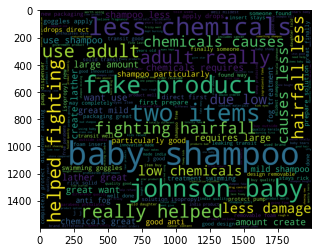

In [16]:
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1600
                     ).generate(shampoo_string)

plt.imshow(wordcloud_ip)

In [18]:
# positive words
with open("positivewords.txt","r") as pos:
  poswords = pos.read().split("\n")

In [19]:
poswords = poswords[38:]

In [21]:
# negative words
with open("negativewords.txt","r") as neg:
  negwords = neg.read().split("\n")

In [22]:
negwords =negwords[39:]

In [23]:
#Negative word cloud word cloud
#taking those words from the words which are present in the negative words

shampoo_neg= ' '.join([w for w in shampoo_rev_words if w in negwords])

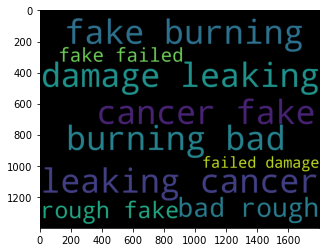

In [24]:
#Negative word cloud
wordcloud_neg= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(shampoo_neg)

plt.imshow(wordcloud_neg)

In [25]:
#Considering only the words which are present in the positive words

shampoo_pos = " ".join([w for w in shampoo_rev_words if w in poswords])

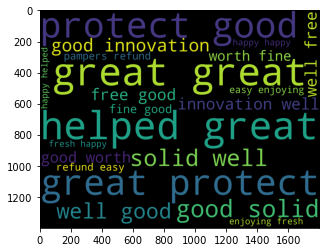

In [26]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(shampoo_pos)

plt.imshow(wordcloud_pos)

In [27]:
##Unique words
shampoo_unique = list(set(" ".join(review_list).split(" ")))

In [28]:
shampoo_unique

['',
 'years',
 'includes',
 'before.',
 'Need',
 'on',
 'too',
 'little',
 'Cancer',
 'outside',
 'quality,',
 "'No",
 'told',
 '4',
 'amount',
 'prepare',
 "baby's",
 'time...where',
 'orders',
 'been',
 'tears',
 'few',
 'it.',
 'as',
 'the',
 'it',
 'finally',
 ',',
 'eyes',
 'off',
 'medical',
 'mom',
 'daughter',
 'Well',
 'from',
 'fine',
 'something',
 'and',
 'now',
 'tests',
 'Drug',
 'leaking',
 'frizzy,',
 'free',
 'n',
 'protect',
 'I',
 'have',
 'through',
 'particularly',
 'kept',
 'order',
 'Good',
 'failed',
 'due',
 'There',
 'what',
 'who',
 'that.',
 'lather.',
 'all',
 'time.',
 '😊',
 'quality.',
 'about',
 'really',
 'someone',
 'helped',
 'has',
 'stays',
 'adult',
 '😢,😟😞',
 'chemicals',
 'direct',
 'hair',
 'All',
 'old',
 'star',
 'brand',
 'use',
 'India',
 'dispenser',
 "Johnson's",
 'innovation',
 'Very',
 'difference',
 'well',
 'by',
 'item.',
 'my',
 'bath',
 '50~50',
 'item',
 'foamy...and',
 'give',
 'products',
 'just',
 '9years',
 'shampoo,',
 'remova